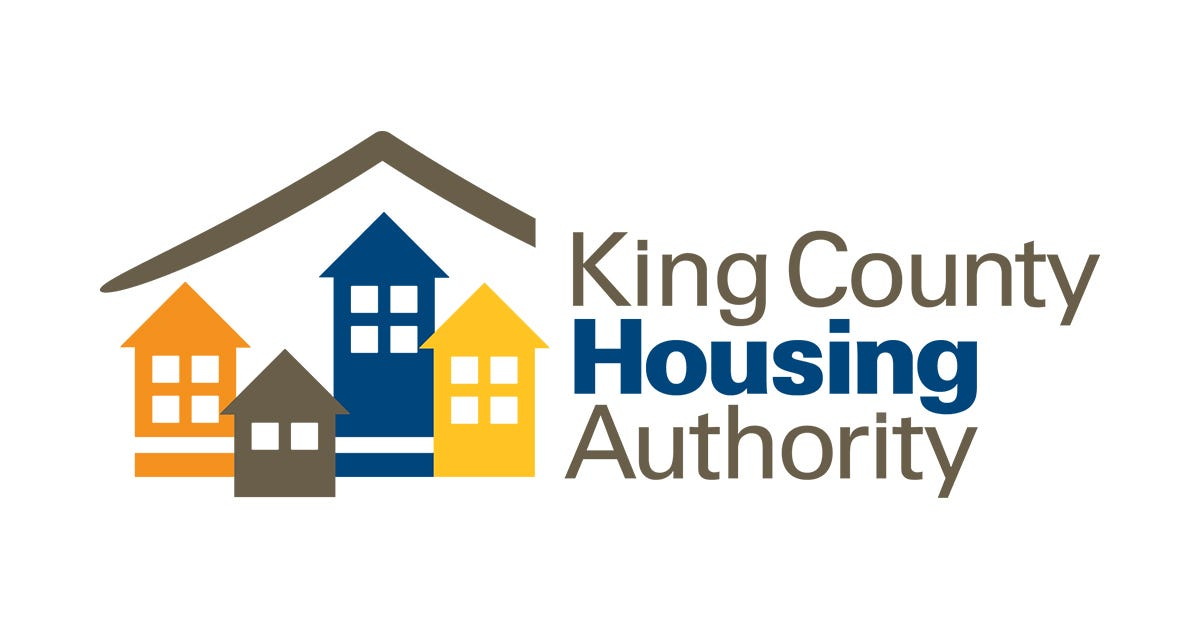

# Project 2 - King County Housing Authority Dataset

## Overview
This project analyses King County Housing data, to provide information for potential buyers and sellers. Through multilinear regression analysis, we aim to determine what factors affect house pricing in the area.  

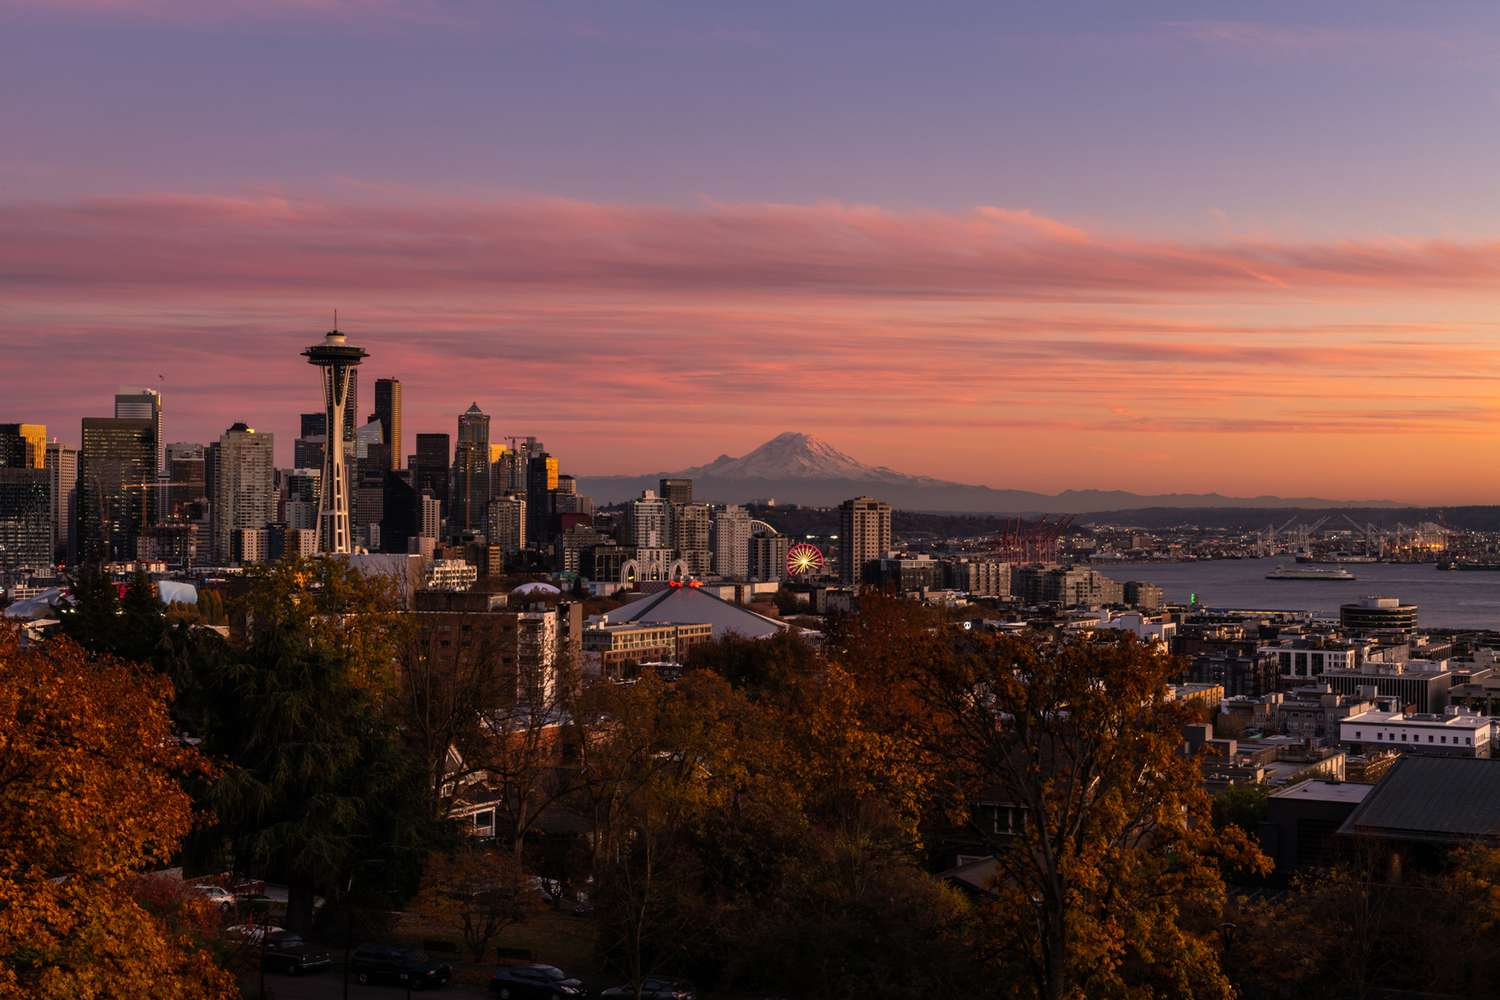

## Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols

df = pd.read_csv('kc_house_data.csv')

The King Count Dataset provides information on the following variables:
<font size="2">
- **id** - unique identified for a house
- **dateDate** - house was sold
- **pricePrice** - is prediction target
- **bedroomsNumber** - of Bedrooms/House
- **bathroomsNumber** - of bathrooms/bedrooms
- **sqft_livingsquare** - footage of the home
- **sqft_lotsquare** - footage of the lot
- **floorsTotal** - floors (levels) in house
- **waterfront** - House which has a view to a waterfront
- **view** - Has been viewed
- **condition** - How good the condition is ( Overall )
- **grade** - overall grade given to the housing unit, based on King County grading system
- **sqft_above** - square footage of house apart from basement
- **sqft_basement** - square footage of the basement
- **yr_built** - Built Year
- **yr_renovated** - Year when house was renovated
- **zipcode** - zip
- **lat** - Latitude coordinate
- **long** - Longitude coordinate
- **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
- **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors</font>

This project will analyse this dataset and determine which factors have the greatest affect on house price. Potential buyers will then know which variables to prioratise. 

In [237]:
#looking through the data, I initially see sqft_basement has a dtype of object, 
#this will need to be adjusted to floats, to be used in our regression analysis. 

#replacing '?' values in the 'sqft_basement' column with Null values, then converting to a float:
df['sqft_basement'] = df['sqft_basement'].replace('?', np.nan)
df['sqft_basement'] = df['sqft_basement'].astype(float)

#Scaling the year built column, by making the earliest year equal to 0. This will make the maximum year, 
#which was 2015, equal to 115
df['yr_built']= df['yr_built'] - 1900

#dropping ID, data, latitude and longitude from the dataframe, as these won't work with our regression model.
df2 = df.drop(['date', 'id', 'lat','long'], axis=1)

# Data Modelling

After initial cleaning of the data, we will perform our first regression model. 

In [238]:
#as price is to be our y axis, we set as the outcome, and all other variables as our predictors
outcome = 'price'  
predictors = df2.drop('price', axis=1)
pred_sum ='+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [239]:
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     1963.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:25:26   Log-Likelihood:            -2.1160e+05
No. Observations:               15429   AIC:                         4.232e+05
Df Residuals:                   15413   BIC:                         4.233e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.543e+06   3.69e+06     -0.418      0.676   -8.78e+06     5.7e+06
bedrooms      -4.072e+04   2408.575    -16.907      0.000   -4.54e+04    -3.6e+04
bathrooms      4.848e+04   4191.867     11.564      0.000    4.03e+04    5.67e+04
sqft_living     115.0711      2.907     39.590      0.000     109.374     120.768
sqft_lot         -0.0437      0.060     -0.723      0.469      -0.162       0.075
floors          2.44e+04   4616.144      5.286      0.000    1.54e+04    3.34e+04
waterfront     6.145e+05   2.24e+04     27.413      0.000    5.71e+05    6.58e+05
view           4.436e+04   2760.271     16.070      0.000    3.89e+04    4.98e+04
condition      1.884e+04   3019.366      6.241      0.000    1.29e+04    2.48e+04
grade          1.175e+05   2722.169     43.176      0.000    1.12e+05    1.23e+05
sqft_above       58.9057      2.834     20.783      0.000      53.350      64.461
sqft_basement    56.1654      3.339     16.819      0.000      49.620      62.711
yr_built      -3633.0171     89.342    -40.664      0.000   -3808.138   -3457.896
yr_renovated     11.2421      4.749      2.367      0.018       1.934      20.550
zipcode           9.9046     37.633      0.263      0.792     -63.861      83.670
sqft_living15    17.2329      4.390      3.925      0.000       8.627      25.839
sqft_lot15       -0.4890      0.092     -5.316      0.000      -0.669      -0.309
==============================================================================
Omnibus:                    11913.870   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           939707.671
Skew:                           3.109   Prob(JB):                         0.00
Kurtosis:                      40.724   Cond. No.                     3.30e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.44e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

We get an **adj. R squared** value of ***0.65***. Showing there is a fairly high correlation between all the data and the price of housing. Essentially, 65% of the housing price can be explained by our variables. 

*The p-value represents a probability of observing your results (or something more extreme) given that the null hypothesis is true*

The majority of column variables yield a p-value of 0. This implies that we can reject a null hypothesis that suggests these columns have no impact on house price.

***sqft_lot*** had a p-value of 0.096 and ***floors*** had a p-value of 0.302. So using the standard alpha value of 0.05, we wouldn't be able to reject the null hypothesis

In [240]:
residuals = model.resid  # Get the residuals
fitted_values = model.fittedvalues  # Get the predicted values

# Perform Breusch-Pagan test for homoskedasticity
bp_test = sm.stats.het_breuschpagan(residuals, model.model.exog)
print("Breusch-Pagan test p-value:", bp_test[1])

Breusch-Pagan test p-value: 0.0


We can see that the ***Breusch Pagan test*** gives a **p-value of 0.0**. This suggests evidence of homoscecatisity, implying variance is roughly equal across the data. 

***We will now move on to a second iteration. We will take a closer look at the categorical variables and add dummy variables. 
I will look at multicolinearity, and remove and variables that are too similar.***

Our first step is to split the data set into continuous and categorical variables.

In [241]:
#We will change the year renovated column to a categorical variable with answers no as '0' and yes as '1'
df2['yr_renovated'].fillna('no', inplace=True)

# Replace numeric values with 'yes'
df2['yr_renovated'] = df2['yr_renovated'].apply(lambda x: '1' if pd.notna(x) and x != 0.0 else '0')
df2['yr_renovated'] = df2['yr_renovated'].astype('int')
df2 = df2.rename(columns={'yr_renovated':'renovated'})

In [242]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,55,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,51,1,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,33,1,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,65,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,87,0,98074,1800,7503


In [243]:
#First, we will split our data set into continuous and categorical variables
continuous = ['price', 'sqft_living',
       'sqft_lot','sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15']

categoricals = ['bedrooms', 'bathrooms','floors', 'waterfront', 'view', 'condition', 'grade', 'renovated']

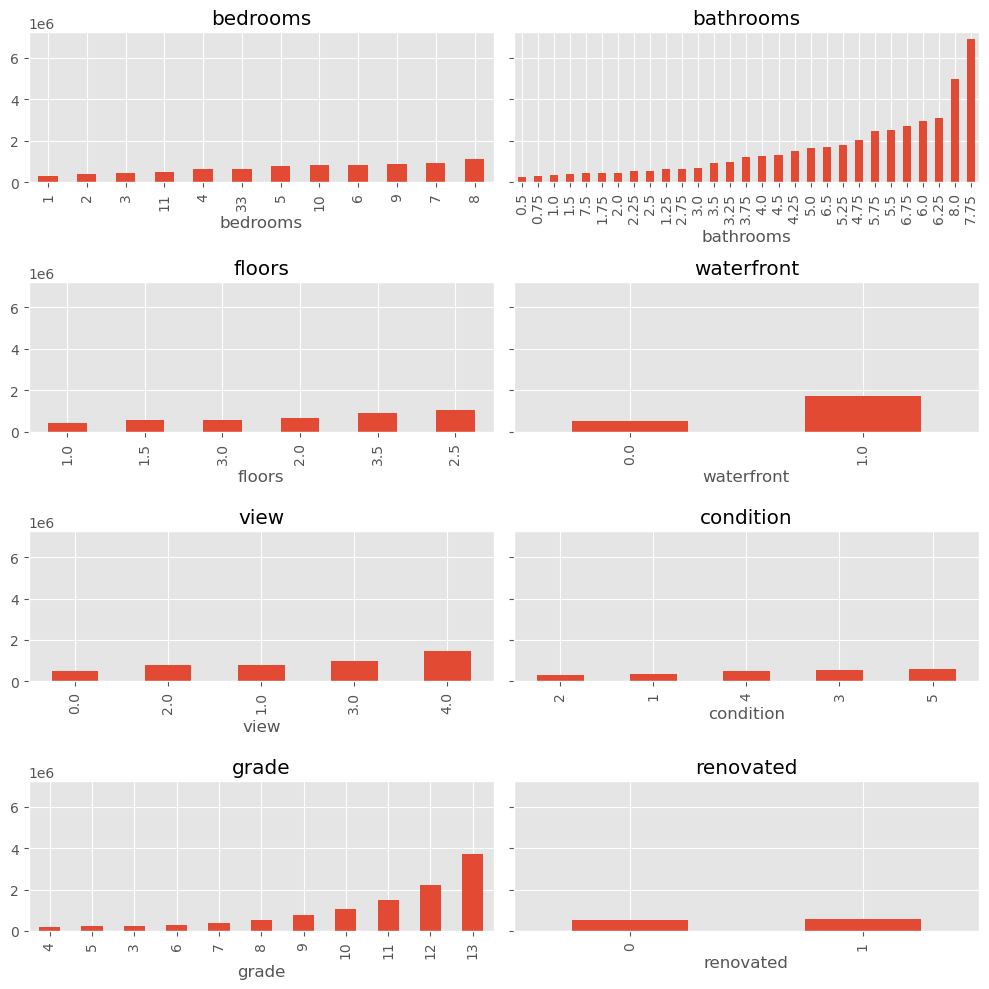

In [244]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,10), sharey=True)

for col, ax in zip(categoricals, axes.flatten()):
    (df2.groupby(col)               # group values together by column of interest
         .mean()['price']        # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
  
    
fig.tight_layout()

Looking at graphs above there are a few interesting things we can initially see. For **bedrooms**, **bathrooms**, **view** and **grade**, we can clearly see that the higher the number, the higher the price of the house. 

Interestingly, this is not the case for **floors** and **condition**. Houses with 3 floors are on average worth less than houses with 2 floors. Perhaps some of the 3 story houses are inner city tenements, which would bring the price down. Note there is not much of a difference in house value between condition 1 & 2, and condition 3 & 4. It seems buyers should not place much emphesis on this rating, when compared to other factors. We shall look into this with our regression model. 

Before creating dummy variables for our categoricals, we will reduce the number of categories. Otherwise there will be too many variables for our model to run. 

In [245]:
bins = [0, 2.1, 4.1, float('inf')]
labels = ['low', 'medium', 'high']
df2['bedrooms'] = pd.cut(df2['bedrooms'], bins=bins, labels=labels, right=False)
#houses with 1-2 beds = 'low'
#houses with 3-4 beds = 'medium'
#houses with 5+ beds = 'high'

bins1 = [0, 1.1, 4.1, float('inf')]
labels1 = ['low', 'medium', 'high']
df2['bathrooms'] = pd.cut(df2['bathrooms'], bins=bins1, labels=labels1, right=False)
#0-1 bathrooms = 'low'
#2-4 bathrooms = medium
#5+ bathrooms = high

bins2 = [0, 5.1, 8.1, 10.1, float('inf')]
labels2 = ['low', 'medium', 'high', 'highest']
df2['grade'] = pd.cut(df2['grade'], bins=bins2, labels=labels2, right=False)
#0-5 = 'low'
#6-8 = 'medium'
#9-10 = 'high'
#11-13 = 'highest'

bins3 = [0, 1.9, 2.9, float('inf')]
labels3 = ['1', '2', '3plus',]
df2['floors'] = pd.cut(df2['floors'], bins=bins3, labels=labels3, right=False)
#changing the number of floors to whole numbers only

In [246]:
continuous = ['price', 'sqft_living',
       'sqft_lot','sqft_above', 'sqft_basement', 'yr_built','sqft_living15', 'sqft_lot15']

categoricals = ['bedrooms', 'bathrooms','floors', 'waterfront', 'view', 'condition', 'grade', 'renovated']

df_continuous = df2[continuous]
df_categorical = df2[categoricals]

In [247]:
#first change the d-type of the categorical columns, so we can get dummy versions
df_categorical = df_categorical.astype('category')


df_dummies = pd.get_dummies(df_categorical, prefix=df_categorical.columns, drop_first=True)
df_dummies.columns = [col.replace('.0', '') for col in df_dummies.columns]
df_dummies = df_dummies.astype(int)
#d-type was then changed back to int, to make easier to work with later

In [248]:
df_premodel = df2.drop(df_categorical.columns, axis=1)
#firstly, we remove columns that are categorical, to then add the dummy versions of these columns

df_premodel = pd.concat([df_premodel, df_dummies], axis=1)
df_premodel = df_premodel.drop('zipcode', axis = 1)

Our next task is to check for any colineararity. We will aim to find highly correlated variables and remove them from the model. If we do not, we risk small changes to the model causing big fluctuations, making the model less reliable.

In [249]:
#save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
df3 = df_continuous.drop('price', axis = 1)
df4=df3.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df4['pairs'] = list(zip(df4.level_0, df4.level_1))

# set index to pairs
df4.set_index(['pairs'], inplace = True)

#drop level columns
df4.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df4.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
df4.drop_duplicates(inplace=True)

In [250]:
df4[(df4.cc>.75) & (df4.cc <1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876448
"(sqft_living, sqft_living15)",0.756402


In [251]:
df_premodel = df_premodel.drop(['sqft_above', 'sqft_living15'], axis =1)

We see that ***sqft_living*** and ***sqft_above*** are highly correlated. This makes sense, and clearly the total sqft of the home will be proportional to the total sqft of the home, minus the basement. 

We also see that the average sqft_living of the home is proportional to the sqft_living of the nearest 15 neighbours. 

***sqft_above*** and **sqft_living15** will be removed from the model.

In [252]:
outcome = 'price'
predictors = df_premodel.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [253]:
model = ols(formula=formula, data=df_premodel).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     1633.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:25:29   Log-Likelihood:            -2.8988e+05
No. Observations:               21143   AIC:                         5.798e+05
Df Residuals:                   21118   BIC:                         5.800e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         9.464e+04   4.23e+04      2.240      0.025    1.18e+04    1.77e+05
sqft_living        195.6248      3.356     58.292      0.000     189.047     202.203
sqft_lot            -0.0304      0.053     -0.577      0.564      -0.134       0.073
sqft_basement        7.3596      4.676      1.574      0.115      -1.805      16.524
yr_built         -2631.1841     71.068    -37.023      0.000   -2770.484   -2491.885
sqft_lot15          -0.5777      0.080     -7.195      0.000      -0.735      -0.420
bedrooms_medium  -5.176e+04   5059.572    -10.230      0.000   -6.17e+04   -4.18e+04
bedrooms_high    -7.728e+04   7676.856    -10.066      0.000   -9.23e+04   -6.22e+04
bathrooms_medium  2.807e+04   5086.756      5.517      0.000    1.81e+04     3.8e+04
bathrooms_high    2.692e+05   1.63e+04     16.526      0.000    2.37e+05    3.01e+05
floors_2          3.676e+04   4540.685      8.096      0.000    2.79e+04    4.57e+04
floors_3plus       1.88e+05   9855.314     19.081      0.000    1.69e+05    2.07e+05
waterfront_1      5.097e+05   2.23e+04     22.879      0.000    4.66e+05    5.53e+05
view_1             1.23e+05   1.23e+04     10.026      0.000    9.89e+04    1.47e+05
view_2            7.098e+04   7489.917      9.477      0.000    5.63e+04    8.57e+04
view_3            1.276e+05   1.02e+04     12.462      0.000    1.07e+05    1.48e+05
view_4            2.958e+05   1.54e+04     19.179      0.000    2.66e+05    3.26e+05
condition_2       4303.5025   4.47e+04      0.096      0.923   -8.32e+04    9.19e+04
condition_3       5.644e+04   4.16e+04      1.357      0.175   -2.51e+04    1.38e+05
condition_4       6.987e+04   4.16e+04      1.680      0.093   -1.16e+04    1.51e+05
condition_5       1.127e+05   4.18e+04      2.694      0.007    3.07e+04    1.95e+05
grade_medium      1.032e+05    1.4e+04      7.361      0.000    7.57e+04    1.31e+05
grade_high         3.01e+05   1.51e+04     19.951      0.000    2.71e+05    3.31e+05
grade_highest     7.039e+05   1.91e+04     36.857      0.000    6.66e+05    7.41e+05
renovated_1       1.331e+04   3707.693      3.589      0.000    6038.937    2.06e+04
==============================================================================
Omnibus:                    12984.789   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           626521.360
Skew:                           2.297   Prob(JB):                         0.00
Kurtosis:                      29.269   Cond. No.                     3.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+06. This might indicate that there are
strong multicollinearity or other numerical probl

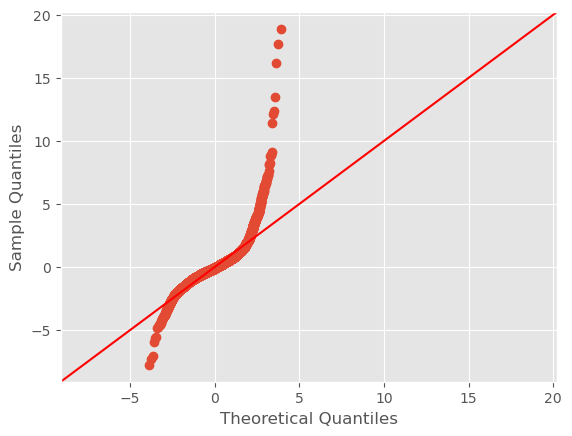

In [254]:
#lets take a look at a QQ plots to analyse the data. 
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
plt.style.use('ggplot')


f = outcome + '~' + pred_sum
model = smf.ols(formula=f, data=df_premodel).fit()

resid1 = model.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)

In [255]:
name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
print(list(zip(name, test)))

[('Jarque-Bera', 626521.3598342502), ('Prob', 0.0), ('Skew', 2.2969298981639277), ('Kurtosis', 29.269336789326832)]


The QQ plot seems to be very heavy tailed. This suggests that compared to a normal distribution, there is much more data at the ends of the distribution, and less data in the centre. 

JB is very high, which suggests the data does not follow normality.  

**In the thrid iteration, there will perform logarithmic transformation to the non normal data. This should result in a **skewness** and **kurtosis** reduction.**

In [256]:
df_continuous = df_continuous.drop(['sqft_above', 'sqft_living15', 'price'], axis=1)

#making columns with 0 numbers non zero by adding 1e-10, so the variables can be log transformed
df_continuous['sqft_basement'] = df_continuous['sqft_basement'].replace(np.nan)
df_continuous['sqft_basement'] = df_continuous['sqft_basement'] + 1e-10
df_continuous['yr_built'] = df_continuous['yr_built'] + 1e-10 
df_continuous['sqft_lot15'] = df_continuous['sqft_lot15'] + 1e-10

In [257]:
#preforming log transformation
log_names = [f'{column}_log' for column in df_continuous.columns]

df_log = np.log(df_continuous)
df_log.columns = log_names
df_premodel['price'] = np.log(df_premodel['price'])

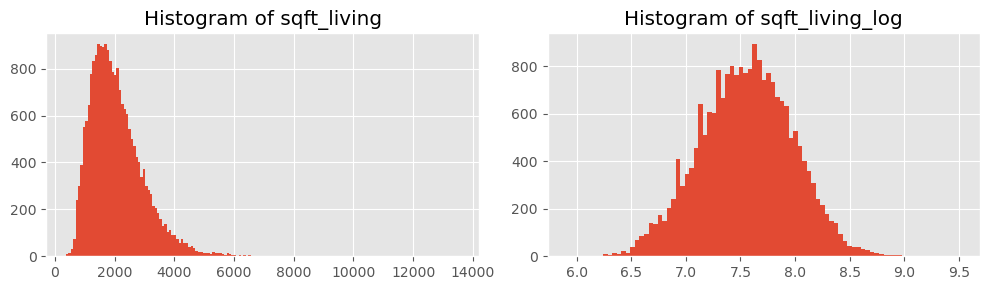

In [258]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

# Plot the histogram for 'sqft_living' in the first subplot
ax1.hist(df_premodel['sqft_living'], bins='auto')
ax1.set_title('Histogram of sqft_living')

# Plot the histogram for 'sqft_living_log' in the second subplot
ax2.hist(df_log['sqft_living_log'], bins='auto')
ax2.set_title('Histogram of sqft_living_log')

plt.tight_layout()
plt.show()

The histograms above show an example of the log transformation successfully normalising a variable.

Next, min-max scaling will be applied the logged variables, this helps ensure undue importance is not given to any individual variable because of it's scale. 

In [259]:
sqft_living_log = df_log['sqft_living_log']
sqft_lot_log = df_log['sqft_lot_log']
sqft_basement_log = df_log['sqft_basement_log']
yr_built_log = df_log['yr_built_log']
sqft_lot15_log = df_log['sqft_lot15_log']

scaled_sqft_living = (sqft_living_log - min(sqft_living_log)) / (max(sqft_living_log) - min(sqft_living_log))
scaled_sqft_lot = (sqft_lot_log - min(sqft_lot_log)) / (max(sqft_lot_log) - min(sqft_lot_log))
scaled_sqft_basement = (sqft_basement_log - min(sqft_basement_log)) / (max(sqft_basement_log) - min(sqft_basement_log))
scaled_yr_built = (yr_built_log - np.mean(yr_built_log)) / (max(yr_built_log) - min(yr_built_log))
scaled_sqft_lot15 = (sqft_lot15_log - min(sqft_lot15_log)) / (max(sqft_lot15_log) - min(sqft_lot15_log))

df_scaled = pd.DataFrame([])
df_scaled['sqft_living'] = scaled_sqft_living
df_scaled['sqft_lot'] = scaled_sqft_lot
df_scaled['sqft_basement'] = scaled_sqft_basement
df_scaled['yr_built'] = scaled_yr_built
df_scaled['sqft_lot_15'] = scaled_sqft_lot15

In [260]:
df_finalmodel = df_premodel.drop(df_continuous.columns, axis=1)
#removing the continuous variables and replacing with the logged and scaled versions
df_finalmodel = pd.concat([df_scaled,df_finalmodel], axis=1)
df_finalmodel['sqft_basement'] = df_finalmodel['sqft_basement'] +1e-10

In [261]:
df_finalmodel.head()

,sqft_living,sqft_lot,sqft_basement,yr_built,sqft_lot_15,price,bedrooms_medium,bedrooms_high,bathrooms_medium,bathrooms_high,...,view_3,view_4,condition_2,condition_3,condition_4,condition_5,grade_medium,grade_high,grade_highest,renovated_1
0,0.322166,0.295858,1.000000e-10,-0.000273,0.300162,12.309982,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0.538392,0.326644,9.209981e-01,-0.002992,0.342058,13.195614,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
2,0.203585,0.366664,1.000000e-10,-0.018667,0.349544,12.100712,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
3,0.463123,0.280700,9.470874e-01,0.005742,0.283185,13.311329,1,0,1,0,...,0,0,0,0,0,1,1,0,0,0
4,0.420302,0.340224,1.000000e-10,0.016240,0.339562,13.142166,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0


Before modeling the final dataframe, we will again check for ***collinearity***.

In [262]:
df_finalmodel_corr=df_finalmodel.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_finalmodel_corr['pairs'] = list(zip(df_finalmodel_corr.level_0, df_finalmodel_corr.level_1))

# set index to pairs
df_finalmodel_corr.set_index(['pairs'], inplace = True)

#drop level columns
df_finalmodel_corr.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_finalmodel_corr.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df_finalmodel_corr.drop_duplicates(inplace=True)

In [263]:
df_finalmodel_corr[(df_finalmodel_corr.cc>.75) & (df_finalmodel_corr.cc <1)]

,cc
pairs,
"(sqft_lot_15, sqft_lot)",0.918665
"(grade_high, grade_medium)",0.890840
"(condition_4, condition_3)",0.812294


Once again, one of the variable pairs with a high correlation is removed.

In [264]:
outcome = 'price'
predictors = df_finalmodel.drop(['sqft_lot_15', 'grade_high', 'condition_3', 'price', 'floors_2', 'bathrooms_medium'], axis = 1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

#I have also removed the dummy variables 'floors_2' and 'bathrooms_medium' as these both had high p-values that suggest 
#they are not statistically significant. This can also help to reduce noise within the model. 

In [265]:
model = ols(formula=formula, data=df_finalmodel).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     1532.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:25:30   Log-Likelihood:                -7569.9
No. Observations:               21597   AIC:                         1.518e+04
Df Residuals:                   21577   BIC:                         1.534e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          12.2625      0.016    773.223      0.000      12.231      12.294
sqft_living         2.6058      0.031     84.700      0.000       2.546       2.666
sqft_lot           -0.4579      0.024    -19.072      0.000      -0.505      -0.411
sqft_basement       0.0539      0.006      9.601      0.000       0.043       0.065
yr_built           -0.5829      0.036    -16.131      0.000      -0.654      -0.512
bedrooms_medium    -0.1367      0.008    -17.132      0.000      -0.152      -0.121
bedrooms_high      -0.1671      0.012    -13.850      0.000      -0.191      -0.143
bathrooms_high      0.1055      0.023      4.591      0.000       0.060       0.151
floors_3plus        0.1711      0.015     11.474      0.000       0.142       0.200
waterfront_1        0.3429      0.035      9.851      0.000       0.275       0.411
view_1              0.2149      0.019     11.179      0.000       0.177       0.253
view_2              0.1606      0.012     13.841      0.000       0.138       0.183
view_3              0.2075      0.016     13.105      0.000       0.176       0.239
view_4              0.3411      0.024     14.170      0.000       0.294       0.388
condition_2        -0.1747      0.027     -6.531      0.000      -0.227      -0.122
condition_4         0.0598      0.006     10.665      0.000       0.049       0.071
condition_5         0.1564      0.009     17.407      0.000       0.139       0.174
grade_medium       -0.2702      0.007    -38.174      0.000      -0.284      -0.256
grade_highest       0.3188      0.017     18.334      0.000       0.285       0.353
renovated_1         0.0355      0.006      6.182      0.000       0.024       0.047
==============================================================================
Omnibus:                       16.954   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.163
Skew:                          -0.059   Prob(JB):                     0.000187
Kurtosis:                       3.071   Cond. No.                         27.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now we will QQ plot our model.

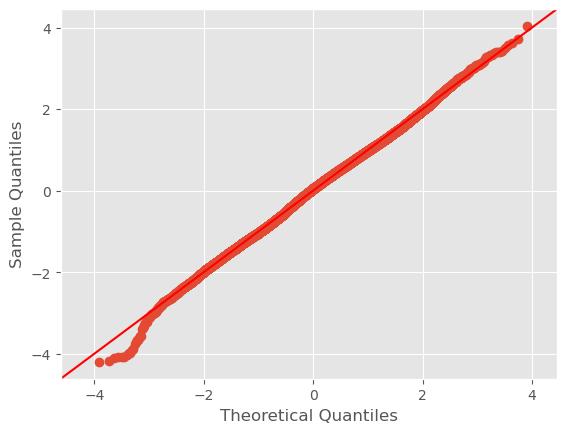

In [266]:
f = outcome + '~' + pred_sum
model = smf.ols(formula=f, data=df_finalmodel).fit()

resid1 = model.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)

We can see from our QQ plot above, that the data looks much more normalized. 

Model validation will be completed to check the performance of the model.

In [267]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


linreg = LinearRegression()
X = predictors
y = df_finalmodel['price']

In [273]:
cv_scores = cross_val_score(linreg, X, y, cv=10)

In [274]:
print("Cross-validation scores:", cv_scores)
print()
# Calculate and print the mean and standard deviation of the scores
print("Mean CV score:", np.mean(cv_scores))
print()
print("Standard deviation of CV scores:", np.std(cv_scores))

Cross-validation scores: [0.57967397 0.56940063 0.53976112 0.57162109 0.52487918 0.57729851
 0.55563089 0.57827444 0.57106023 0.64537837]

Mean CV score: 0.5712978435150298

Standard deviation of CV scores: 0.030068647387641888


The cross validation proved successful, with a very small standard deviation between the cross validation scores. This suggests the model is not overly dependent on a specific portion of the data, and is not underfitted or overfitted. 

### Evaluation

After three interatons, our model has been refined. Our first iteration produces a good adjusted R squared value of **0.66**, however there are lot of variables that have a high p value, which are not likely to be adding to the model. 

In the second iteration the categorical variables are split into their dummies, allowing closer examination of each individual category value on the price. Variables with strong multicolineararity are removed, as these will underline the statistical significance of our independant variable. After modeling, we do find evidence the data is highly tailed. 

The third and final iteration log transforms and scales some of the data. Looking at our QQ plot before and after log transformation, we can clearly see the data became more normalized, with less skew and kurtosis. After cross validation, we see that the model is neither underfitted or over fitted, making it robust, and suitable for modeling any new data. With p values of close to 0, we can confidently say that all or variables used in the final iteration are correlated with house price. Our final r squared value is smaller than our initial one, however, we have reduced the noise and made our model far more robust.

### Conclusions

From our multilinear regression analysis, we are able to conclude which factors most affect house price, and what buyers and sellers should be taking into account when planning sales and purchases.

The variable with the largest affect on house price is the **sqft of the living area**. This makes sense and seems like an obvious correlation. That is followed by **sqft of the lot**. Again, an obvious correlation, and sellers aren't really able to change or improve the size of the lot. If homeowners are considering an extension of their property, they should know this is one of the best ways to increase the value of their house. 

***House grade*** has a clear impact on house price, which represents construction quality. I would recommend sellers research the King County house grading system and find ways to increase the grade of their house before attempting to sell. 

***Properties with a view of the waterfront*** are worth more. If potential buyers should are interested in buying near the coast, they should bear this in mind. When looking at areas to live, buyers will need to consider how valuable a waterfront view is for them, and are they willing to pay the extra for this.

***Older houses*** are more valuable than newer houses. Buyers should take this into consideration when investigating property.

In future I would like to use this model for king county residents looking to sell to get an initial estimate of what their house might be worth.
